# EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\akhil.slal\Downloads\data.csv')  

## Data Type Conversion

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['tower_id'] = pd.to_numeric(df['tower_id'], errors='coerce').astype('Int64')
df['users_connected'] = pd.to_numeric(df['users_connected'], errors='coerce').astype('Int64')
df['download_speed'] = pd.to_numeric(df['download_speed'], errors='coerce')
df['upload_speed'] = pd.to_numeric(df['upload_speed'], errors='coerce')
df['latency'] = pd.to_numeric(df['latency'], errors='coerce')
df['weather'] = df['weather'].astype('string')

#  Keep congestion as numeric to preserve NaN values
df['congestion'] = pd.to_numeric(df['congestion'], errors='coerce').astype('Int64')


##               Data Description Section


In [4]:
print("\n================= BASIC INFORMATION =================")
print(df.info())

print("\n================= FIRST 5 ROWS =================")
print(df.head())

print("\n================= SHAPE OF DATA =================")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n================= DATA TYPES =================")
print(df.dtypes)

print("\n================= MISSING VALUES =================")
print(df.isnull().sum())

print("\n================= DUPLICATE ROWS =================")
print("Duplicate Count:", df.duplicated().sum())

print("\n================= STATISTICAL SUMMARY (NUMERIC) =================")
print(df.describe().T)

print("\n================= STATISTICAL SUMMARY (CATEGORICAL) =================")
print(df.describe(include=['string']).T)

print("\n================= UNIQUE VALUE COUNTS =================")
for col in ['tower_id', 'weather', 'congestion']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

print("\n================= CORRELATION MATRIX =================")
print(df.corr(numeric_only=True))

if 'timestamp' in df.columns:
    print("\n================= TIMESTAMP RANGE =================")
    print("From:", df['timestamp'].min(), "→ To:", df['timestamp'].max())


================= BASIC INFORMATION =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        4104 non-null   datetime64[ns]
 1   tower_id         4101 non-null   Int64         
 2   users_connected  4104 non-null   Int64         
 3   download_speed   4106 non-null   float64       
 4   upload_speed     4103 non-null   float64       
 5   latency          4089 non-null   float64       
 6   weather          4102 non-null   string        
 7   congestion       4105 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), float64(3), string(1)
memory usage: 271.3 KB
None

================= FIRST 5 ROWS =================
            timestamp  tower_id  users_connected  download_speed  \
0 2025-01-18 09:00:00         5              534       39.292288   
1 2025-01-22 21:00:00         3     

 # Additional Information

In [5]:
print("Average download speed:", round(df['download_speed'].mean(), 2), "Mbps")
print("Average upload speed:", round(df['upload_speed'].mean(), 2), "Mbps")
print("Average latency:", round(df['latency'].mean(), 2), "ms")
print("Total Towers:", df['tower_id'].nunique())
print("Weather Conditions Observed:", df['weather'].nunique())
print("Congestion Values — 1s:", (df['congestion'] == 1).sum(),
      "| 0s:", (df['congestion'] == 0).sum(),
      "| Missing:", df['congestion'].isna().sum())

Average download speed: 52.07 Mbps
Average upload speed: 25.19 Mbps
Average latency: 104.81 ms
Total Towers: 5
Weather Conditions Observed: 4
Congestion Values — 1s: 233 | 0s: 3872 | Missing: 40


# Visualization for Data Description Summary 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="whitegrid")


#  Missing Values Visualization


C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\3593418070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


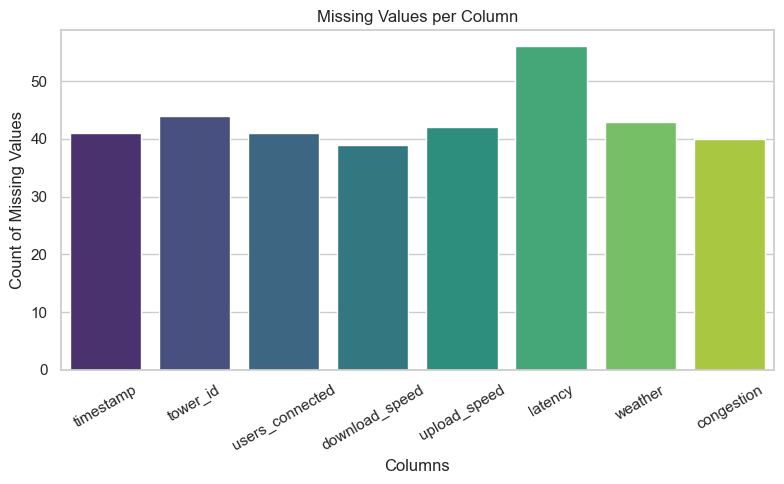

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(8, 5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#  Duplicate Rows Visualization

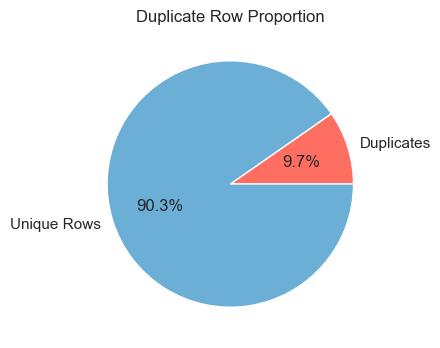

In [9]:
duplicate_count = df.duplicated().sum()

plt.figure(figsize=(4, 4))
plt.pie([duplicate_count, len(df) - duplicate_count],
        labels=['Duplicates', 'Unique Rows'],
        autopct='%1.1f%%',
        colors=['#FF6F61', '#6BAED6'])
plt.title("Duplicate Row Proportion")
plt.show()

#  Data Type Distribution

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\52749670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dtype_counts.index.astype(str), y=dtype_counts.values, palette="coolwarm")


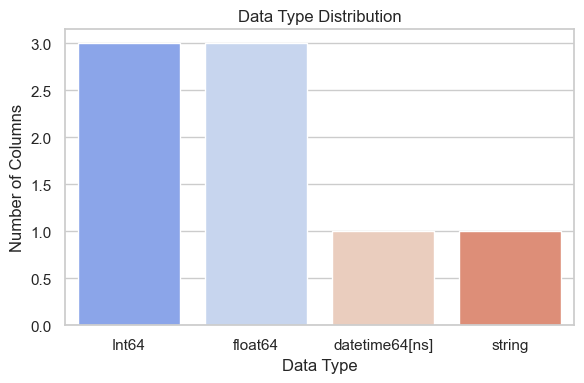

In [10]:
dtype_counts = df.dtypes.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=dtype_counts.index.astype(str), y=dtype_counts.values, palette="coolwarm")
plt.title("Data Type Distribution")
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()

# Correlation Heatmap (Numeric Columns)

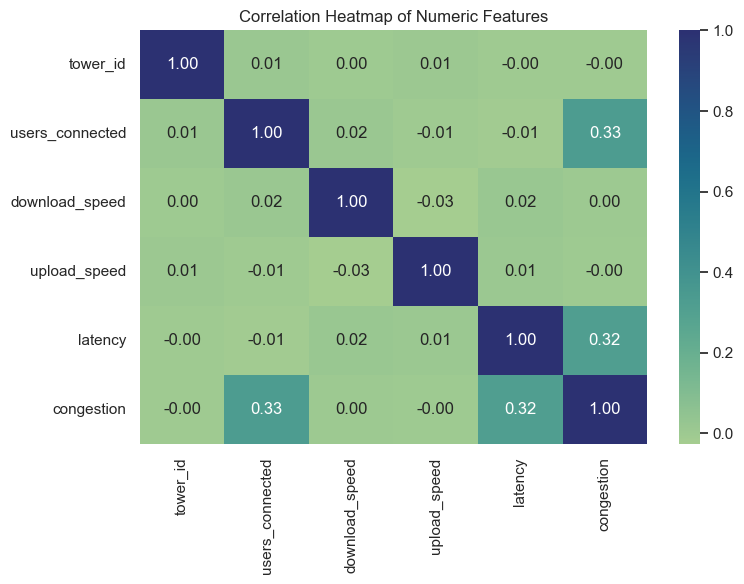

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

#  INITIAL DATA SUMMARY 

In [12]:
import pandas as pd
import numpy as np

print("===== INITIAL DATA SUMMARY =====")
print(f"Initial shape: {df.shape}")
print("\nMissing values before cleaning:\n", df.isnull().sum())

===== INITIAL DATA SUMMARY =====
Initial shape: (4145, 8)

Missing values before cleaning:
 timestamp          41
tower_id           44
users_connected    41
download_speed     39
upload_speed       42
latency            56
weather            43
congestion         40
dtype: int64


# 1) Convert Data Types

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['tower_id'] = pd.to_numeric(df['tower_id'], errors='coerce')
df['users_connected'] = pd.to_numeric(df['users_connected'], errors='coerce')
df['download_speed'] = pd.to_numeric(df['download_speed'], errors='coerce')
df['upload_speed'] = pd.to_numeric(df['upload_speed'], errors='coerce')
df['latency'] = pd.to_numeric(df['latency'], errors='coerce')
df['weather'] = df['weather'].astype('string')

# 2) Remove Duplicate Rows

In [14]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
print(f"\nRemoved {duplicate_count} duplicate rows.")



Removed 401 duplicate rows.


# 3) Track Missing Values Before Cleaning

In [15]:
missing_before = df.isnull().sum()

# 4) Drop Rows Missing Timestamp or Tower_id

In [16]:
df.dropna(subset=['timestamp', 'tower_id'], inplace=True)

# 5) Fill Numeric Columns with Median

In [17]:
df['users_connected'].fillna(round(df['users_connected'].median()), inplace=True)
df['tower_id'].fillna(round(df['tower_id'].median()), inplace=True)

for col in ['download_speed', 'upload_speed', 'latency']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\3572245316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['users_connected'].fillna(round(df['users_connected'].median()), inplace=True)
C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\3572245316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

# 6) Timestamp-Based Forward & Backward Fill for Weather

In [18]:
# --- Fill missing weather using nearest timestamps on the same day ---
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.sort_values('timestamp')

# Extract date to handle within the same day
df['date'] = df['timestamp'].dt.date

# For each day, forward fill then backward fill
df['weather'] = (
    df.groupby('date')['weather']
      .apply(lambda x: x.ffill().bfill())
      .reset_index(level=0, drop=True)
)

# 7) Convert Integer-like Columns Properly

In [19]:
df['tower_id'] = df['tower_id'].round().astype('Int64')
df['users_connected'] = df['users_connected'].round().astype('Int64')

# 8) Remove Invalid or Negative Entries

In [20]:
df = df[
    (df['download_speed'] >= 0) &
    (df['upload_speed'] >= 0) &
    (df['latency'] >= 0) &
    (df['users_connected'] >= 0)
]

# 9) Compute Correlation with Congestion (for non-missing values)

In [21]:
corr_matrix = df[['users_connected', 'download_speed', 'upload_speed', 'latency', 'congestion']].corr()
print("\nCorrelation with 'congestion':")
print(corr_matrix['congestion'].sort_values(ascending=False))


Correlation with 'congestion':
congestion         1.000000
users_connected    0.329683
latency            0.314840
download_speed     0.001463
upload_speed      -0.006192
Name: congestion, dtype: float64


# 10) Predict Congestion using Weighted Correlation-based Logic

In [22]:
missing_congestion_before = df['congestion'].isna().sum()

# Use correlation strengths as weights
corrs = corr_matrix['congestion'].drop('congestion').abs()
weights = corrs / corrs.sum()

# Compute a congestion score
df['congestion_score'] = (
    (1 - df['download_speed'] / df['download_speed'].max()) * weights['download_speed'] +
    (1 - df['upload_speed'] / df['upload_speed'].max()) * weights['upload_speed'] +
    (df['latency'] / df['latency'].max()) * weights['latency'] +
    (df['users_connected'] / df['users_connected'].max()) * weights['users_connected']
)

# Decide cutoff using the mean congestion score of congested entries
if df['congestion'].notna().sum() > 0:
    mean_congested = df.loc[df['congestion'] == 1, 'congestion_score'].mean()
    df.loc[df['congestion'].isna(), 'congestion'] = np.where(
        df.loc[df['congestion'].isna(), 'congestion_score'] >= mean_congested, 1, 0
    )
else:
    # fallback if no congestion values exist
    threshold = df['congestion_score'].median()
    df['congestion'].fillna(np.where(df['congestion_score'] >= threshold, 1, 0), inplace=True)

# Cleanup
df['congestion'] = df['congestion'].astype(int)
df.drop(columns='congestion_score', inplace=True)

missing_congestion_after = df['congestion'].isna().sum()
congestion_filled = missing_congestion_before - missing_congestion_after

#  Track filled values
missing_after = df.isnull().sum()
filled_values = (missing_before - missing_after).to_dict()

#  Final cleanup
df.reset_index(drop=True, inplace=True)

# Final Summary

In [23]:
print("\n===== DATA CLEANING COMPLETED =====")
print(f"Final dataset shape: {df.shape}")
print(f"\nDuplicate rows removed: {duplicate_count}")

print("\nFilled missing values per column:")
for col, count in filled_values.items():
    if count > 0:
        print(f"  {col}: {count} values filled")

print(f"\nCongestion values filled using correlation-based logic: {congestion_filled}")
print("\nRemaining missing values:\n", df.isnull().sum())
print("\nCongestion distribution:\n", df['congestion'].value_counts())


===== DATA CLEANING COMPLETED =====
Final dataset shape: (3669, 9)

Duplicate rows removed: 401

Filled missing values per column:
  congestion: 40.0 values filled
  download_speed: 39.0 values filled
  latency: 56.0 values filled
  timestamp: 41.0 values filled
  tower_id: 44.0 values filled
  upload_speed: 42.0 values filled
  users_connected: 41.0 values filled
  weather: 43.0 values filled

Congestion values filled using correlation-based logic: 17

Remaining missing values:
 timestamp          0
tower_id           0
users_connected    0
download_speed     0
upload_speed       0
latency            0
weather            0
congestion         0
date               0
dtype: int64

Congestion distribution:
 congestion
0    3463
1     206
Name: count, dtype: int64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure proper data types
df['timestamp'] = pd.to_datetime(df['timestamp'])

# UNIVARIATE AND BIVARIATE ANALYSIS

## Timestamp

count                             3669
mean     2025-01-16 00:23:25.069501440
min                2025-01-01 00:00:00
25%                2025-01-08 13:00:00
50%                2025-01-16 01:00:00
75%                2025-01-23 13:00:00
max                2025-01-31 00:00:00
Name: timestamp, dtype: object


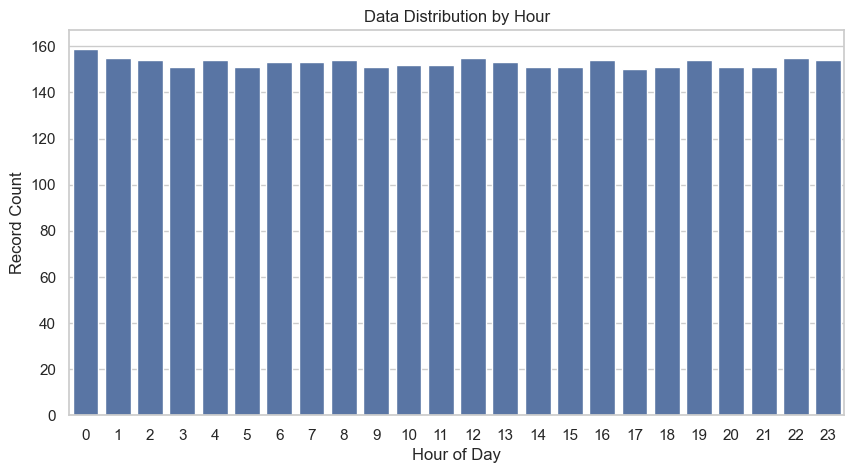

<Figure size 1000x600 with 0 Axes>

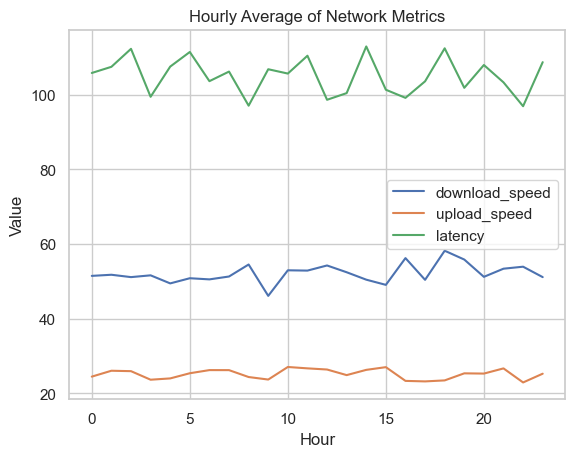

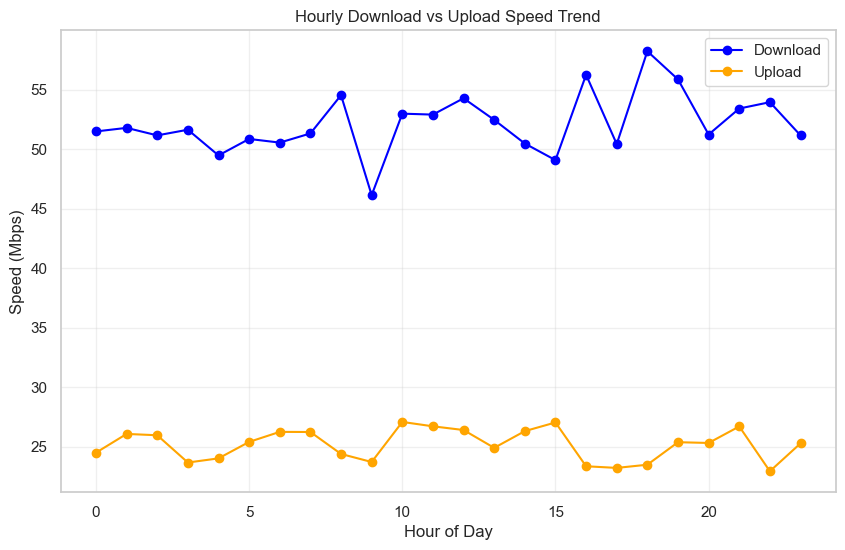

In [25]:
# Extract useful features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()
 
# Univariate
print(df['timestamp'].describe())
 
# Plot record distribution by hour
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df)
plt.title('Data Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Record Count')
plt.show()

plt.figure(figsize=(10,6))
df.groupby('hour')[['download_speed','upload_speed','latency']].mean().plot()
plt.title('Hourly Average of Network Metrics')
plt.ylabel('Value')
plt.xlabel('Hour')
plt.show()

hourly_perf = df.groupby(df['timestamp'].dt.hour)[['download_speed','upload_speed']].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(hourly_perf['timestamp'], hourly_perf['download_speed'], label='Download', color='blue', marker='o')
plt.plot(hourly_perf['timestamp'], hourly_perf['upload_speed'], label='Upload', color='orange', marker='o')
plt.title("Hourly Download vs Upload Speed Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Speed (Mbps)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## Tower ID

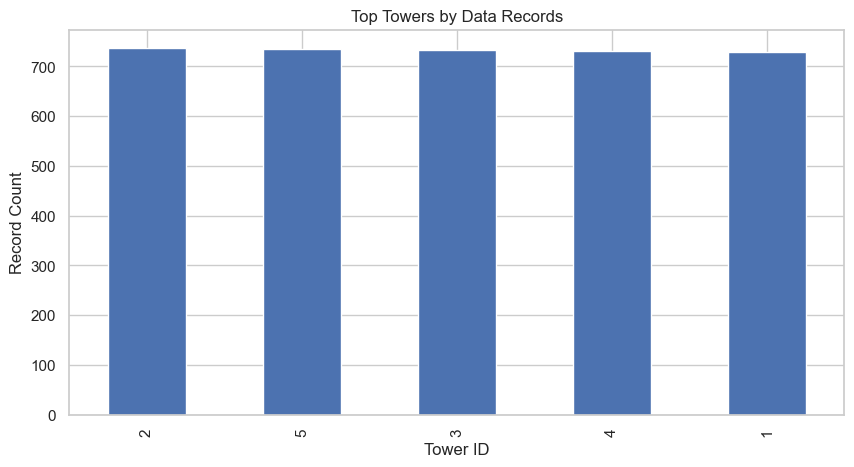

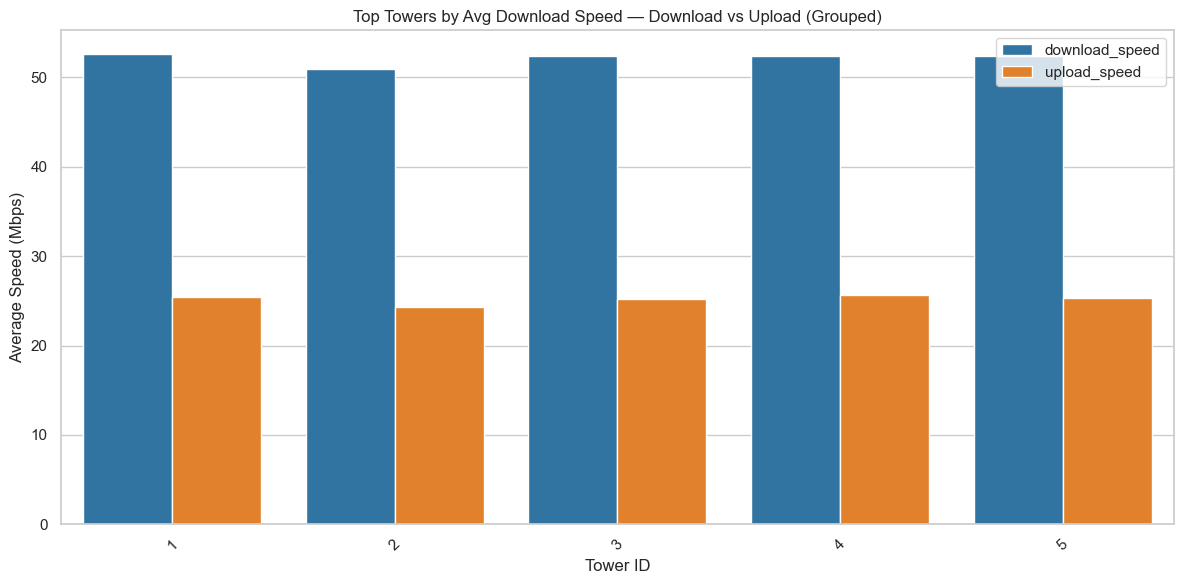

In [26]:
#Univariate
plt.figure(figsize=(10,5))
df['tower_id'].value_counts().head(20).plot(kind='bar')
plt.title('Top Towers by Data Records')
plt.xlabel('Tower ID')
plt.ylabel('Record Count')
plt.show()

#Bivariate
df['download_speed'] = pd.to_numeric(df['download_speed'], errors='coerce')
df['upload_speed']   = pd.to_numeric(df['upload_speed'], errors='coerce')

# 1) Select top 10 towers by average download speed
tower_avg_all = df.groupby('tower_id')[['download_speed', 'upload_speed']].mean()
top10_towers = tower_avg_all.sort_values('download_speed', ascending=False).head(10)
top10_towers = top10_towers.reset_index()

# --- Option A: Grouped bar chart (side-by-side) ---
melted = top10_towers.melt(id_vars='tower_id', value_vars=['download_speed','upload_speed'],
                           var_name='metric', value_name='avg_speed')

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='tower_id', y='avg_speed', hue='metric',
            palette={'download_speed':'#1f77b4','upload_speed':'#ff7f0e'})
plt.title("Top Towers by Avg Download Speed — Download vs Upload (Grouped)")
plt.xlabel("Tower ID")
plt.ylabel("Average Speed (Mbps)")
plt.xticks(rotation=45)
plt.legend(title='')
plt.tight_layout()
plt.show()

## Users Connected

count        3669.0
mean     531.337149
std       275.21162
min            50.0
25%           295.0
50%           540.0
75%           764.0
max           999.0
Name: users_connected, dtype: Float64


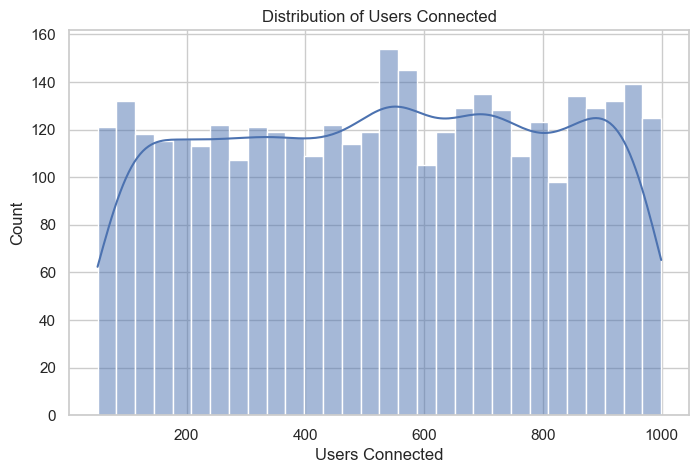

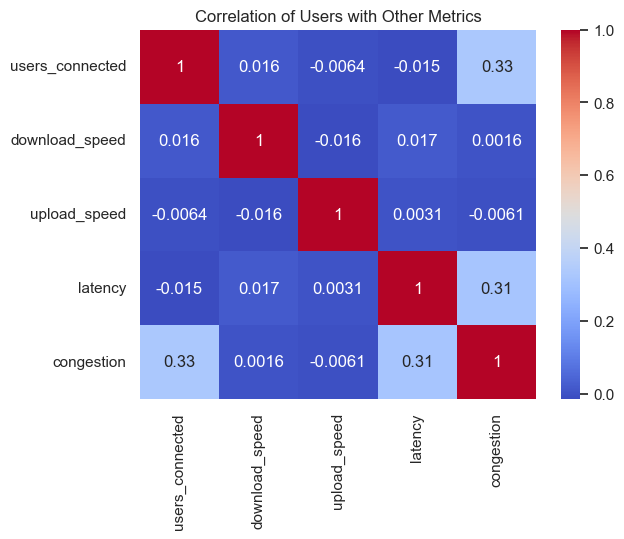

In [27]:
# Univariate
print(df['users_connected'].describe())
 
plt.figure(figsize=(8,5))
sns.histplot(df['users_connected'], bins=30, kde=True)
plt.title('Distribution of Users Connected')
plt.xlabel('Users Connected')
plt.show()

#Bivariate
# Correlation heatmap
corr_users = df[['users_connected','download_speed','upload_speed','latency','congestion']].corr()
sns.heatmap(corr_users, annot=True, cmap='coolwarm')
plt.title('Correlation of Users with Other Metrics')
plt.show()

## Download Speed

count    3669.000000
mean       52.150436
std        27.242340
min         5.002918
25%        28.773879
50%        52.571751
75%        75.053945
max        99.985678
Name: download_speed, dtype: float64


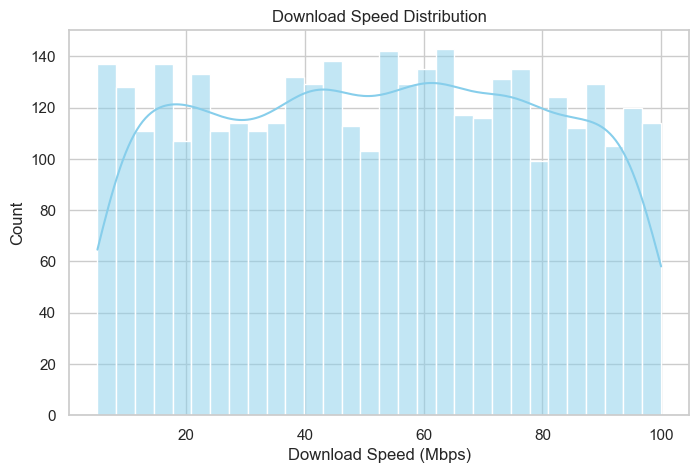

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\521557449.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weather', y='download_speed', estimator='mean', errorbar=None, palette='coolwarm')


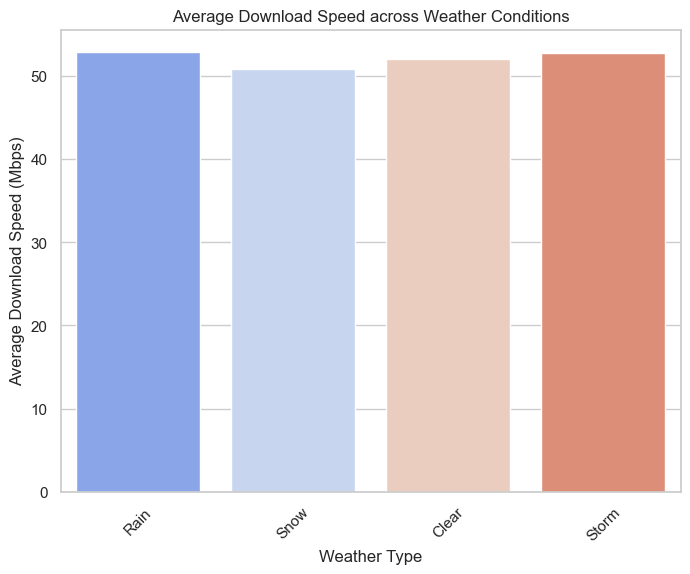

In [28]:
#Univariate
print(df['download_speed'].describe())
 
plt.figure(figsize=(8,5))
sns.histplot(df['download_speed'], bins=30, kde=True, color='skyblue')
plt.title('Download Speed Distribution')
plt.xlabel('Download Speed (Mbps)')
plt.show()

#Bivariate
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='weather', y='download_speed', estimator='mean', errorbar=None, palette='coolwarm')
plt.title("Average Download Speed across Weather Conditions")
plt.xlabel("Weather Type")
plt.ylabel("Average Download Speed (Mbps)")
plt.xticks(rotation=45)
plt.show()




## Upload Speed

count    3669.000000
mean       25.170976
std        13.952246
min         1.054885
25%        13.419998
50%        25.121615
75%        36.882738
max        49.991019
Name: upload_speed, dtype: float64


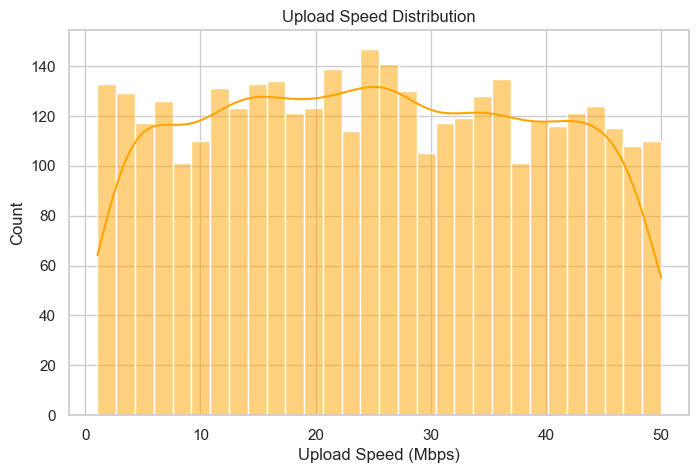

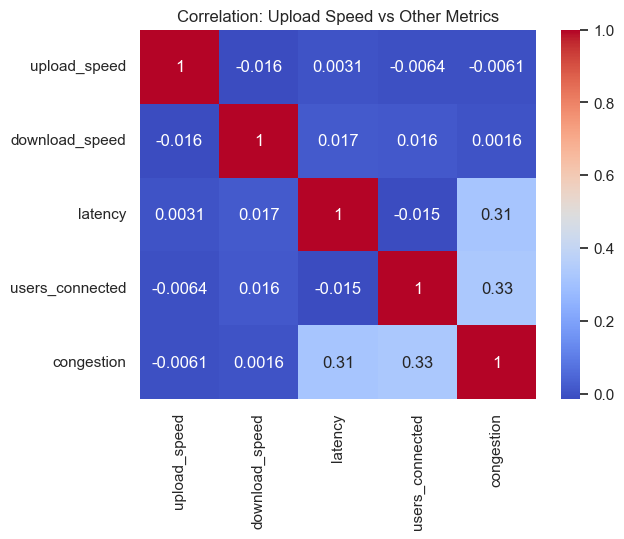

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\2472813061.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='upload_speed', data=weather_upload, palette='viridis')


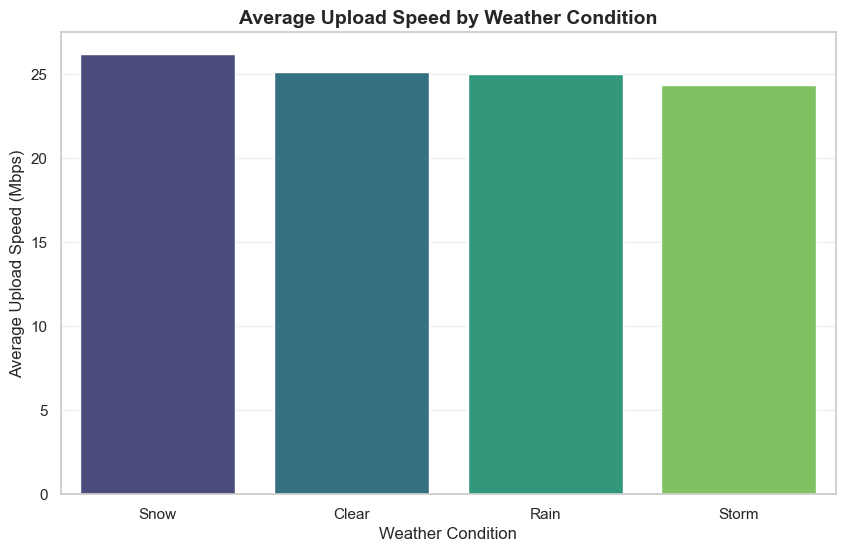

In [29]:
#Univariate
print(df['upload_speed'].describe())
plt.figure(figsize=(8,5))
sns.histplot(df['upload_speed'], bins=30, kde=True, color='orange')
plt.title('Upload Speed Distribution')
plt.xlabel('Upload Speed (Mbps)')
plt.show()

#Bivariate

 
corr_up = df[['upload_speed','download_speed','latency','users_connected','congestion']].corr()
sns.heatmap(corr_up, annot=True, cmap='coolwarm')
plt.title('Correlation: Upload Speed vs Other Metrics')
plt.show()

weather_upload = df.groupby('weather')['upload_speed'].mean().reset_index()
 
# Sort by upload speed (optional, for cleaner visual)
weather_upload = weather_upload.sort_values('upload_speed', ascending=False)
 
# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='weather', y='upload_speed', data=weather_upload, palette='viridis')
 
# Add titles and labels
plt.title('Average Upload Speed by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Upload Speed (Mbps)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
 
plt.show()
 

## Latency

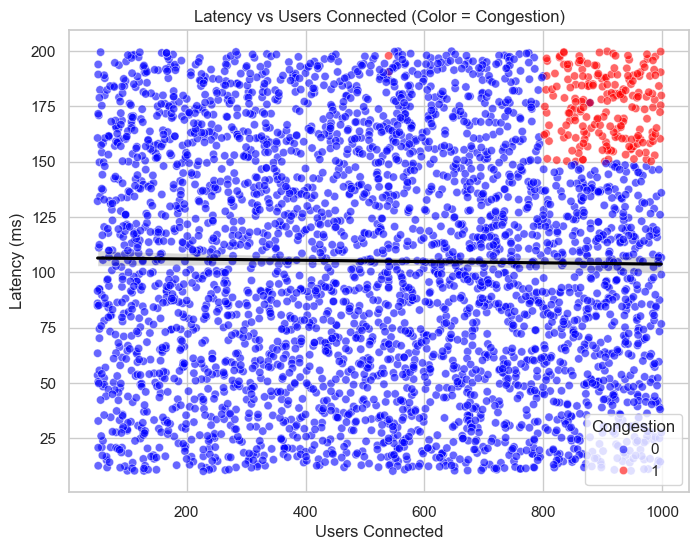

In [30]:
#Bivariate
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='users_connected', y='latency', hue='congestion',
                palette={0:'blue', 1:'red'}, alpha=0.6)
sns.regplot(data=df, x='users_connected', y='latency', scatter=False, color='black')
plt.title("Latency vs Users Connected (Color = Congestion)")
plt.xlabel("Users Connected")
plt.ylabel("Latency (ms)")
plt.legend(title="Congestion")
plt.show()

## Congestion

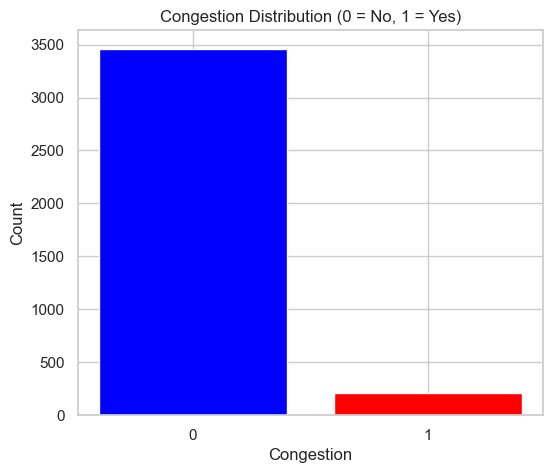

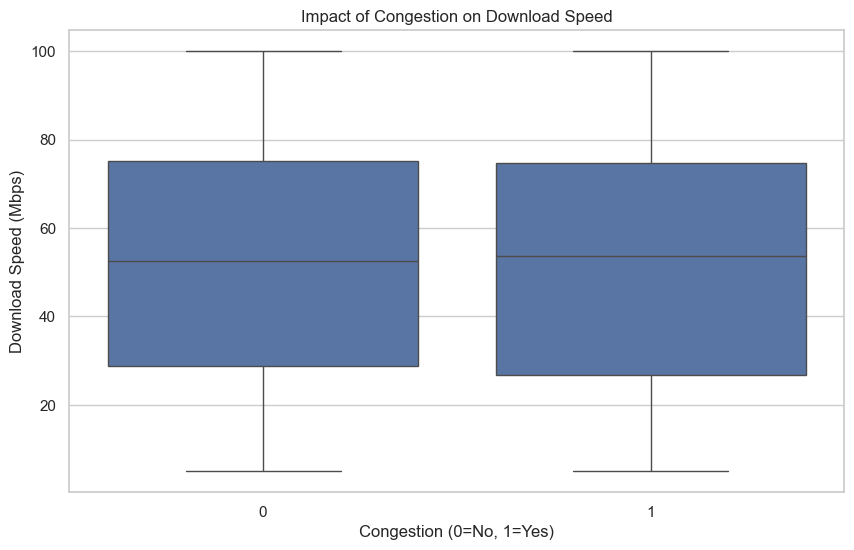

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\3388726526.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


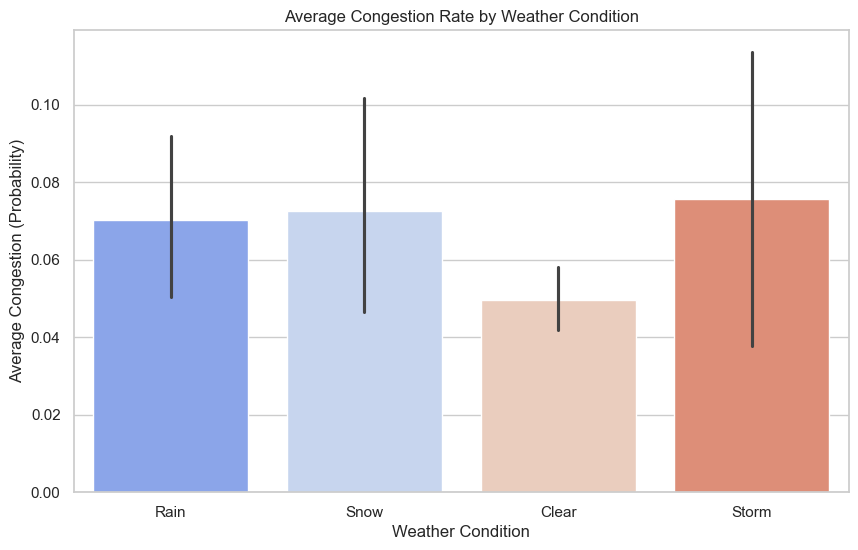

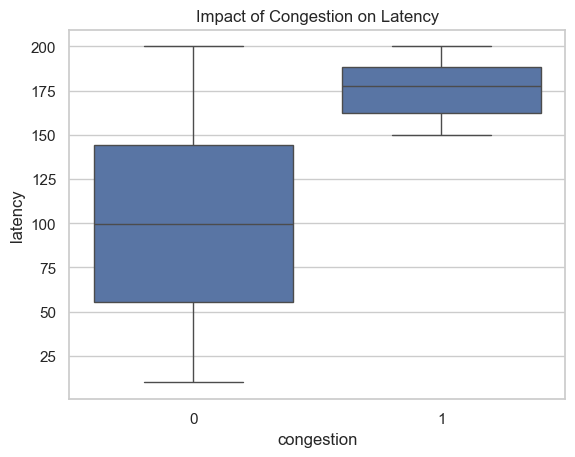

In [31]:
# Univariate
cong_counts = df['congestion'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(cong_counts.index.astype(str), cong_counts.values, color=['blue','red'])
plt.title("Congestion Distribution (0 = No, 1 = Yes)")
plt.xlabel("Congestion")
plt.ylabel("Count")
plt.show()

#Bivariate
plt.figure(figsize=(10,6))
sns.boxplot(x='congestion', y='download_speed', data=df)
plt.title('Impact of Congestion on Download Speed')
plt.xlabel('Congestion (0=No, 1=Yes)')
plt.ylabel('Download Speed (Mbps)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='weather',
    y='congestion',   # Mean of 0/1 gives congestion rate
    palette='coolwarm'
)
plt.title("Average Congestion Rate by Weather Condition")
plt.ylabel("Average Congestion (Probability)")
plt.xlabel("Weather Condition")
plt.show()

 
sns.boxplot(x='congestion', y='latency', data=df)
plt.title('Impact of Congestion on Latency')
plt.show()

## KPI

## Netwok Performance & Inefficiency

### Average Download Speed

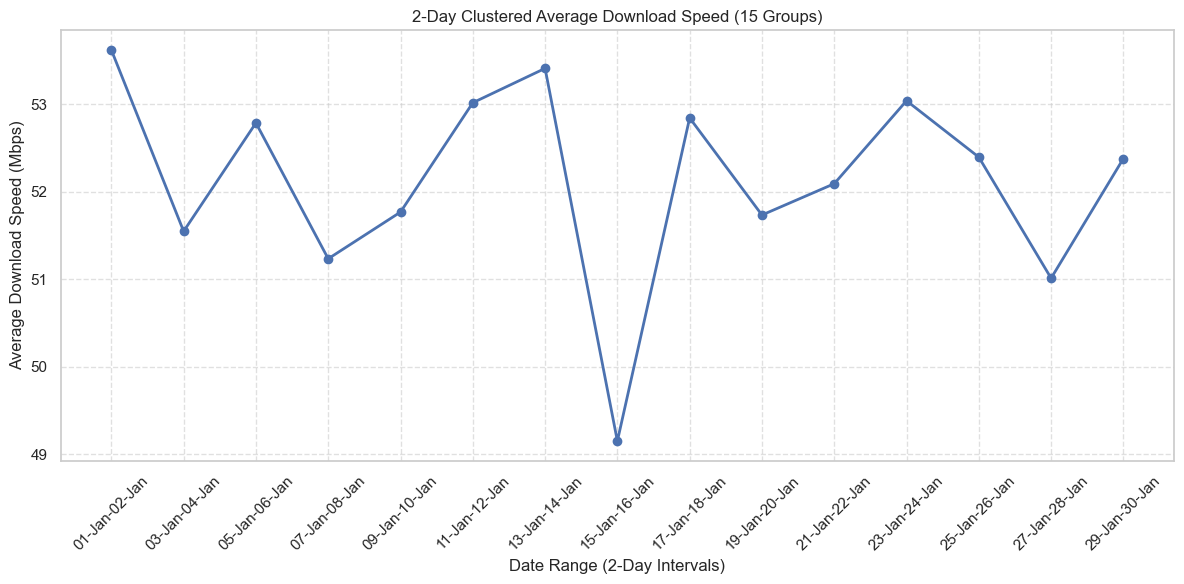

=== KPI Summary: Average Download Speed (2-Day Clusters) ===
Total Groups: 15
Overall Avg Speed: 52.14 Mbps
Peak Cluster: 01-Jan-02-Jan (53.62 Mbps)
Lowest Cluster: 15-Jan-16-Jan (49.15 Mbps)


In [32]:
# ---  Resample data in 2-day clusters ---
df.set_index('timestamp', inplace=True)
two_day_avg = (
    df['download_speed']
    .resample('2D')
    .mean()
    .reset_index()
    .rename(columns={'timestamp': 'date', 'download_speed': 'avg_download_speed'})
)
 
# ---  Force exactly 15 clusters for a 30-day period ---
# If dataset spans 30 days, 2D resample naturally gives 15 entries.
# But to ensure correct labeling even if a few days are missing:
two_day_avg = two_day_avg.head(15)
 
# ---  Plot line graph with exactly 15 x-axis labels ---
plt.figure(figsize=(12,6))
plt.plot(two_day_avg['date'], two_day_avg['avg_download_speed'], marker='o', linewidth=2)
 
# Format x-axis to show 15 groups with readable labels
labels = []
for i in range(len(two_day_avg)):
    start = two_day_avg['date'].iloc[i].strftime('%d-%b')
    end = (two_day_avg['date'].iloc[i] + pd.Timedelta(days=1)).strftime('%d-%b')
    labels.append(f"{start}-{end}")
 
plt.xticks(two_day_avg['date'], labels, rotation=45)
 
plt.title("2-Day Clustered Average Download Speed (15 Groups)")
plt.xlabel("Date Range (2-Day Intervals)")
plt.ylabel("Average Download Speed (Mbps)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
 
# ---  KPI Summary ---
print("=== KPI Summary: Average Download Speed (2-Day Clusters) ===")
print(f"Total Groups: {len(two_day_avg)}")
print(f"Overall Avg Speed: {two_day_avg['avg_download_speed'].mean():.2f} Mbps")
print(f"Peak Cluster: {labels[two_day_avg['avg_download_speed'].idxmax()]} "
      f"({two_day_avg['avg_download_speed'].max():.2f} Mbps)")
print(f"Lowest Cluster: {labels[two_day_avg['avg_download_speed'].idxmin()]} "
      f"({two_day_avg['avg_download_speed'].min():.2f} Mbps)")

### Peak Hour Speed Variation

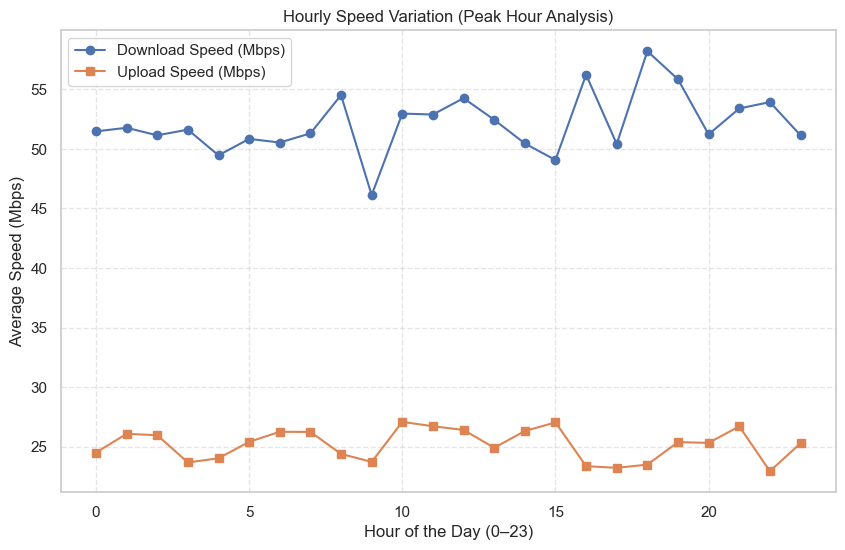

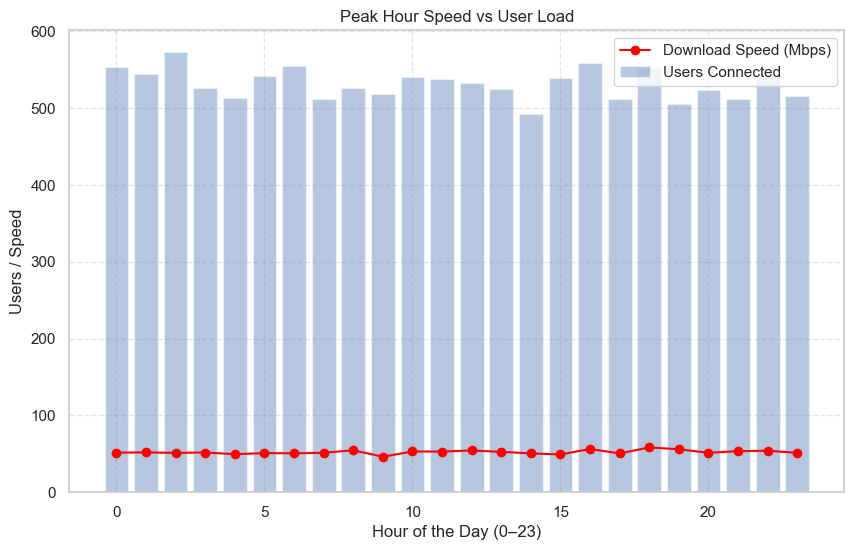

<Figure size 700x500 with 0 Axes>

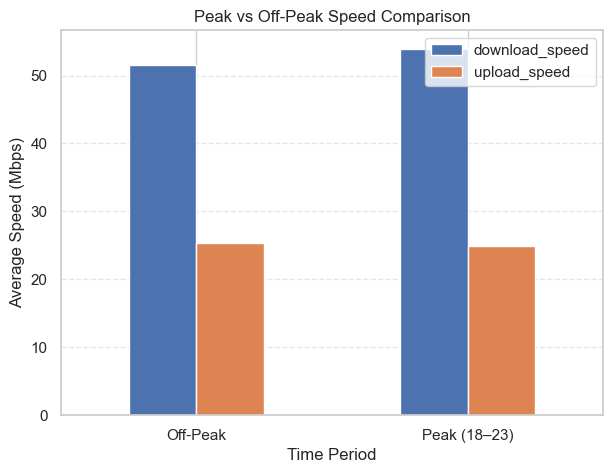

In [33]:
df.reset_index(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
 
# Extract hour and day to analyze patterns
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
 
# === Step 3: Group Data by Hour ===
hourly_perf = df.groupby('hour')[['download_speed', 'upload_speed', 'users_connected']].mean().reset_index()
 
# === Step 4A: Line Chart for Speed Variation by Hour ===
plt.figure(figsize=(10,6))
plt.plot(hourly_perf['hour'], hourly_perf['download_speed'], marker='o', label='Download Speed (Mbps)')
plt.plot(hourly_perf['hour'], hourly_perf['upload_speed'], marker='s', label='Upload Speed (Mbps)')
plt.title("Hourly Speed Variation (Peak Hour Analysis)")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Average Speed (Mbps)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
 
# === Step 4B: Overlay Users Connected — to identify peak hours ===
plt.figure(figsize=(10,6))
plt.bar(hourly_perf['hour'], hourly_perf['users_connected'], alpha=0.4, label='Users Connected')
plt.plot(hourly_perf['hour'], hourly_perf['download_speed'], color='red', marker='o', label='Download Speed (Mbps)')
plt.title("Peak Hour Speed vs User Load")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Users / Speed")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
 
# === Step 4C: Peak vs Off-Peak Comparison ===
# Define peak hours as 18:00–23:00 (you can adjust this based on actual data patterns)
df['peak_hour'] = df['hour'].apply(lambda x: 'Peak (18–23)' if 18 <= x <= 23 else 'Off-Peak')
 
peak_comparison = df.groupby('peak_hour')[['download_speed', 'upload_speed']].mean()
 
# Bar chart comparing peak vs. off-peak
plt.figure(figsize=(7,5))
peak_comparison.plot(kind='bar', figsize=(7,5))
plt.title("Peak vs Off-Peak Speed Comparison")
plt.xlabel("Time Period")
plt.ylabel("Average Speed (Mbps)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Average Upload Speed

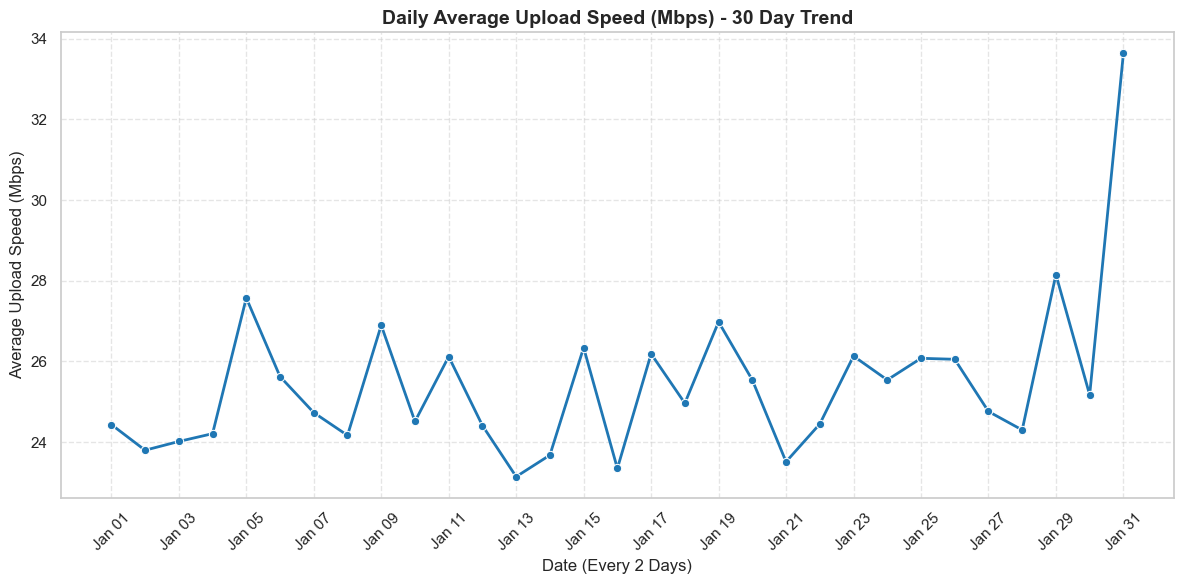

===== Upload Speed Summary =====
Minimum Average Upload Speed: 23.14 Mbps on 2025-01-13
Maximum Average Upload Speed: 33.64 Mbps on 2025-01-31


In [34]:
import matplotlib.dates as mdates
# === Convert timestamp to datetime and extract date ===
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date
 
# === Compute average upload speed per day ===
daily_upload = (
    df.groupby('date', as_index=False)['upload_speed']
      .mean()
      .rename(columns={'upload_speed': 'avg_upload_speed'})
      .sort_values('date')
)
 
# === Plot line chart (x-axis every 2 days) ===
plt.figure(figsize=(12,6))
sns.lineplot(
    data=daily_upload,
    x='date',
    y='avg_upload_speed',
    marker='o',
    linewidth=2,
    color='#1f77b4'
)
 
plt.title("Daily Average Upload Speed (Mbps) - 30 Day Trend", fontsize=14, fontweight='bold')
plt.xlabel("Date (Every 2 Days)")
plt.ylabel("Average Upload Speed (Mbps)")
 
# Format x-axis for every 2 days
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
 
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
 
# ===  Find Min/Max days ===
min_day = daily_upload.loc[daily_upload['avg_upload_speed'].idxmin()]
max_day = daily_upload.loc[daily_upload['avg_upload_speed'].idxmax()]
 
print("===== Upload Speed Summary =====")
print(f"Minimum Average Upload Speed: {min_day['avg_upload_speed']:.2f} Mbps on {min_day['date']}")
print(f"Maximum Average Upload Speed: {max_day['avg_upload_speed']:.2f} Mbps on {max_day['date']}")
print("================================")

## Network Load & Reliability

### Congestion Rate

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\646939485.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('user_bin')


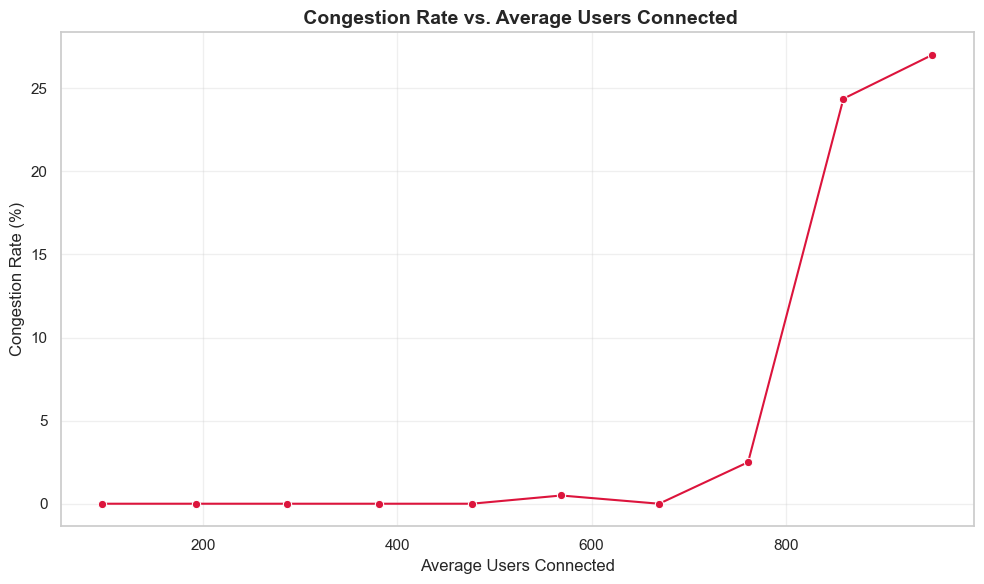

In [35]:
# ===========================================
# Calculate Average Users vs Congestion Rate
# ===========================================
# Bin users into ranges (to analyze trend)
df['user_bin'] = pd.cut(df['users_connected'], bins=10)
 
user_kpi = (
    df.groupby('user_bin')
      .agg(
          avg_users=('users_connected', 'mean'),
          total_records=('congestion', 'count'),
          total_congested=('congestion', lambda x: (x == 1).sum())
      )
)
user_kpi['congestion_rate'] = (user_kpi['total_congested'] / user_kpi['total_records']) * 100
user_kpi.dropna(inplace=True)
 
# ===========================================
# Visualization — Congestion vs Avg Users
# ===========================================
plt.figure(figsize=(10,6))
sns.lineplot(
    data=user_kpi,
    x='avg_users',
    y='congestion_rate',
    marker='o',
    color='crimson'
)
 
plt.title(" Congestion Rate vs. Average Users Connected", fontsize=14, fontweight='bold')
plt.xlabel("Average Users Connected")
plt.ylabel("Congestion Rate (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Peak User Load per Tower


   tower_id  Peak_User_Load
0         1             999
1         2             999
2         3             999
3         4             999
4         5             999


C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\3266900371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tower_id', y='Peak_User_Load', data=peak_load, palette='coolwarm')


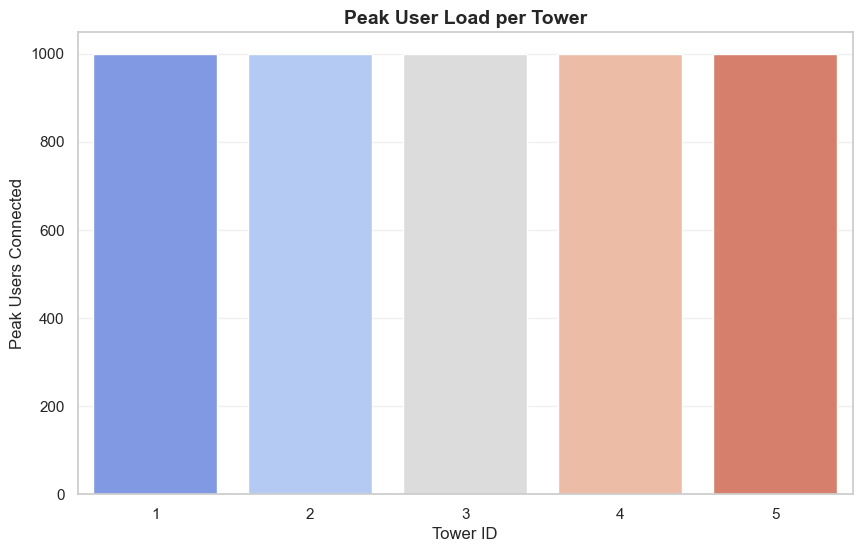

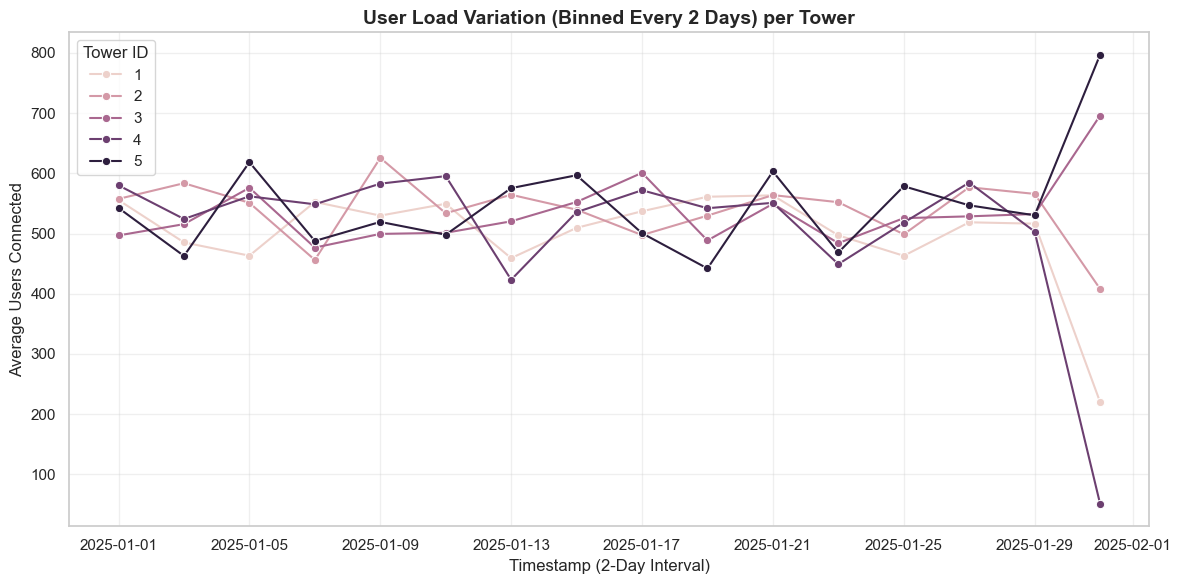

In [36]:
peak_load = df.groupby('tower_id')['users_connected'].max().reset_index()
peak_load.rename(columns={'users_connected': 'Peak_User_Load'}, inplace=True)
print(peak_load)


plt.figure(figsize=(10,6))
sns.barplot(x='tower_id', y='Peak_User_Load', data=peak_load, palette='coolwarm')
plt.title('Peak User Load per Tower', fontsize=14, fontweight='bold')
plt.xlabel('Tower ID')
plt.ylabel('Peak Users Connected')
plt.grid(axis='y', alpha=0.3)
plt.show()


# ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
 
# Bin timestamps into 2-day intervals
df_2day = (
    df.groupby([pd.Grouper(key='timestamp', freq='2D'), 'tower_id'])
      ['users_connected']
      .mean()
      .reset_index()
)
 
# Plot the binned averages
plt.figure(figsize=(12,6))
sns.lineplot(x='timestamp', y='users_connected', hue='tower_id', data=df_2day, marker='o')
 
plt.title('User Load Variation (Binned Every 2 Days) per Tower', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp (2-Day Interval)')
plt.ylabel('Average Users Connected')
plt.legend(title='Tower ID')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Average Latency 

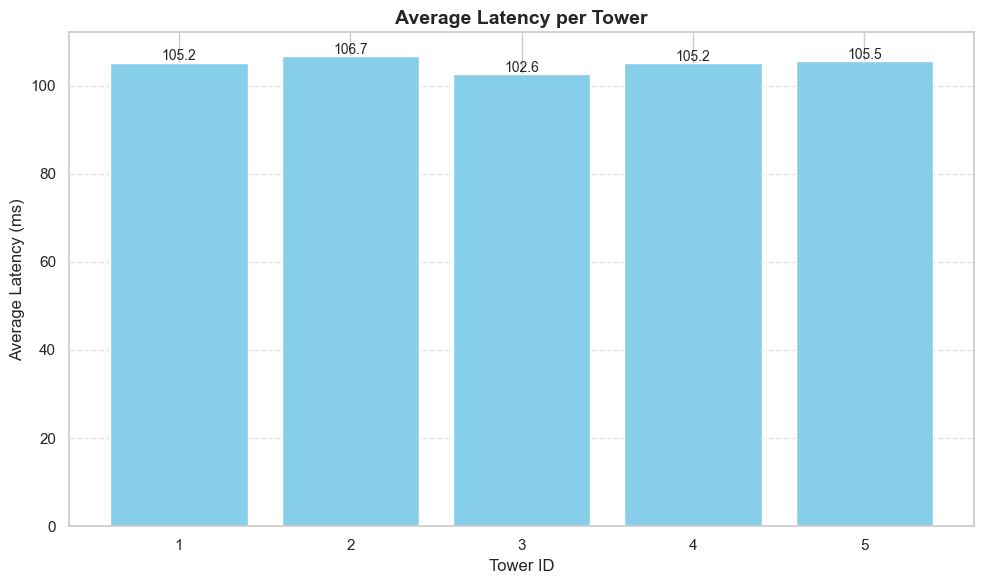

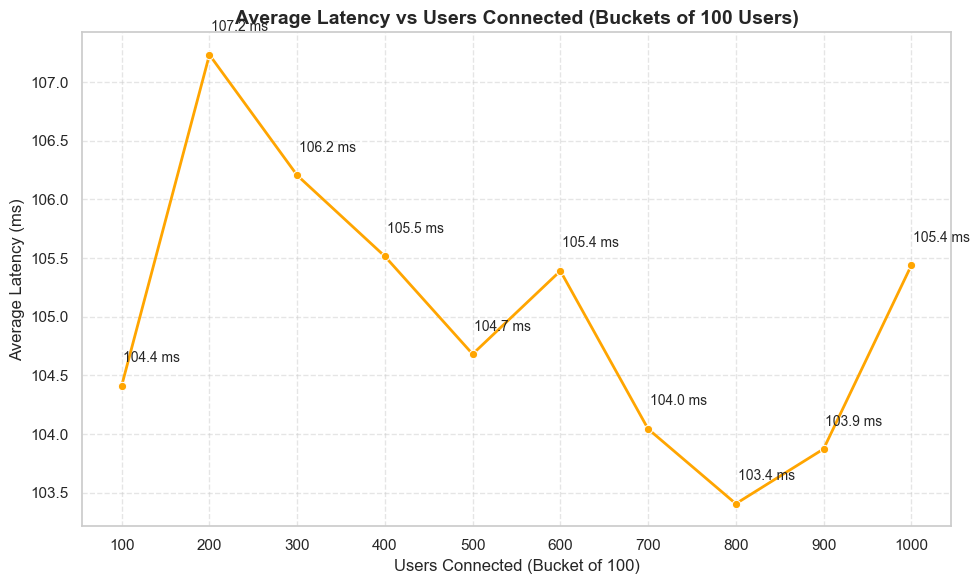

In [37]:
# === Compute average latency per tower ===
tower_latency = df.groupby('tower_id', as_index=False)['latency'].mean().rename(columns={'latency':'avg_latency'})
 
# === Plot Bar Chart ===
plt.figure(figsize=(10,6))
bars = plt.bar(tower_latency['tower_id'], tower_latency['avg_latency'], color='skyblue')
 
# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}", ha='center', fontsize=10)
 
plt.title("Average Latency per Tower", fontsize=14, fontweight='bold')
plt.xlabel("Tower ID", fontsize=12)
plt.ylabel("Average Latency (ms)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Convert numeric
df['latency'] = pd.to_numeric(df['latency'], errors='coerce')
df['users_connected'] = pd.to_numeric(df['users_connected'], errors='coerce')
 
# === Create user buckets (interval = 100 users) ===
df['user_bucket'] = (df['users_connected'] // 100) * 100 + 100  # 0-100 -> 100, 101-200 -> 200, etc.
 
# ===  Aggregate average latency per bucket ===
bucket_stats = df.groupby('user_bucket', as_index=False).agg(
    avg_latency=('latency', 'mean')
)
 
# ===  Plot line chart ===
plt.figure(figsize=(10,6))
sns.lineplot(
    data=bucket_stats,
    x='user_bucket',
    y='avg_latency',
    marker='o',
    linewidth=2,
    color='orange'
)
 
# Annotate average latency on each point
for i, row in bucket_stats.iterrows():
    plt.text(row['user_bucket']+2, row['avg_latency']+0.2, f"{row['avg_latency']:.1f} ms", fontsize=10)
 
plt.title("Average Latency vs Users Connected (Buckets of 100 Users)", fontsize=14, fontweight='bold')
plt.xlabel("Users Connected (Bucket of 100)")
plt.ylabel("Average Latency (ms)")
plt.xticks(bucket_stats['user_bucket'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Uptime / Availability per Tower


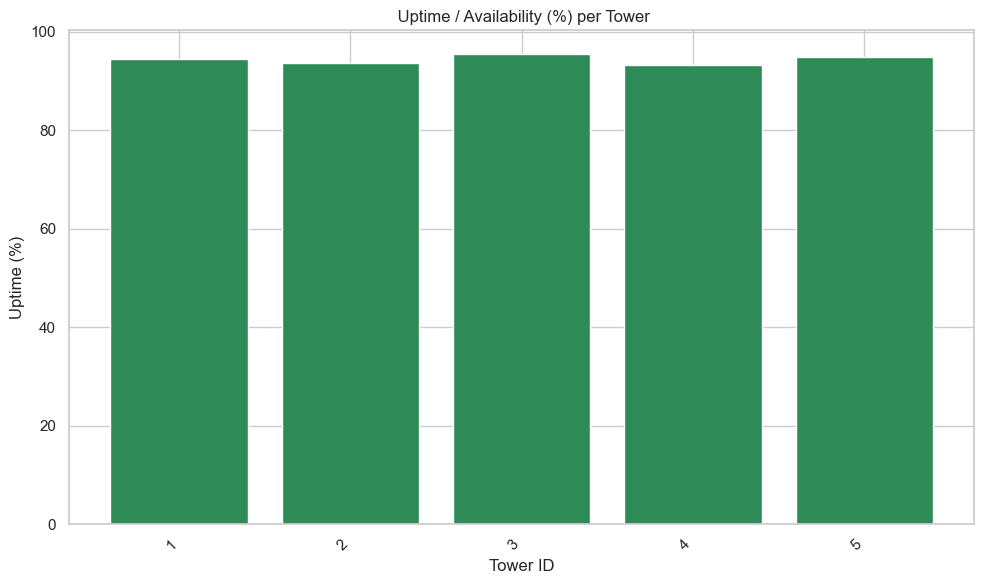

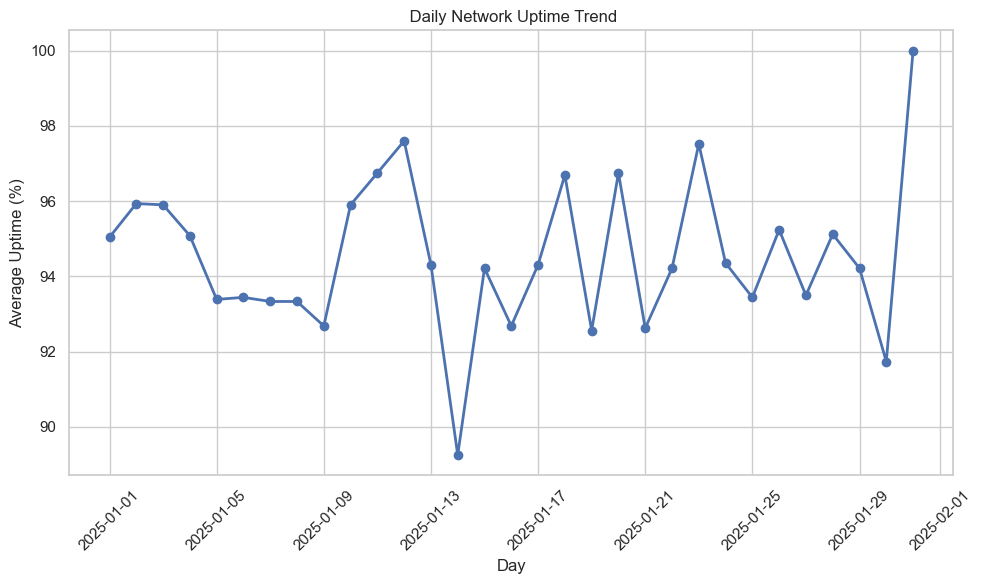

=== Summary Statistics for Tower Uptime ===
       tower_id  uptime_percent
count       5.0        5.000000
mean        3.0       94.385217
std    1.581139        0.870594
min         1.0       93.306011
25%         2.0       93.758480
50%         3.0       94.520548
75%         4.0       94.836957
max         5.0       95.504087


In [38]:
 
# Assume congestion = 0 means "UP", 1 means "DOWN"
df['day'] = df['timestamp'].dt.date
 
# === Step 3: Calculate Uptime Percentage per Tower ===
uptime_per_tower = (
    df.groupby('tower_id')['congestion']
    .apply(lambda x: (x == 0).mean() * 100)
    .reset_index(name='uptime_percent')
)
 
# === Step 4: Bar Chart - Uptime % per Tower ===
plt.figure(figsize=(10,6))
plt.bar(uptime_per_tower['tower_id'], uptime_per_tower['uptime_percent'], color='seagreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tower ID")
plt.ylabel("Uptime (%)")
plt.title(" Uptime / Availability (%) per Tower")
plt.tight_layout()
plt.show()
 
# === Step 5: Line Chart - Daily Uptime Trend (Average across towers) ===
daily_uptime = (
    df.groupby('day')['congestion']
    .apply(lambda x: (x == 0).mean() * 100)
    .reset_index(name='uptime_percent')
)
 
plt.figure(figsize=(10,6))
plt.plot(daily_uptime['day'], daily_uptime['uptime_percent'], marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel("Day")
plt.ylabel("Average Uptime (%)")
plt.title(" Daily Network Uptime Trend")
plt.tight_layout()
plt.show()
 
 
# === Step 7: Summary Statistics ===
print("=== Summary Statistics for Tower Uptime ===")
print(uptime_per_tower.describe())

# Operational and External Factors

## Weather Related Performance Drops

  weather  Avg_Download_Speed  Avg_Upload_Speed  Avg_Latency  \
0   Clear           52.101936         25.129047   103.770996   
1    Rain           52.936629         25.004788   107.947583   
2    Snow           50.887047         26.185992   109.914215   
3   Storm           52.818771         24.368023   105.148612   

   Congestion_Rate(%)  
0            4.951644  
1            7.027027  
2            7.267442  
3            7.567568  


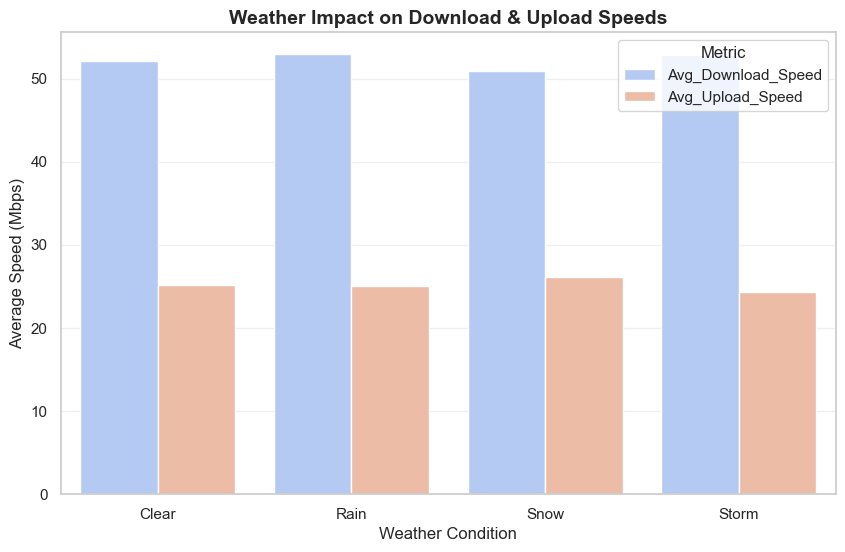

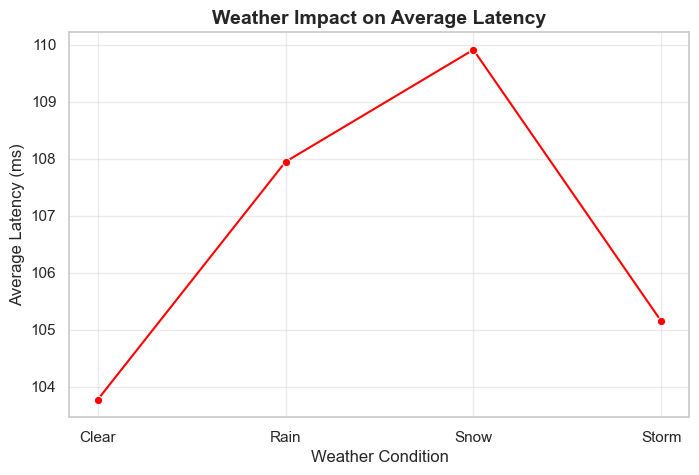

In [39]:
weather_perf = df.groupby('weather').agg({
    'download_speed': 'mean',
    'upload_speed': 'mean',
    'latency': 'mean',
    'congestion': lambda x: (x.sum() / len(x)) * 100
}).reset_index()
 
weather_perf.rename(columns={
    'download_speed': 'Avg_Download_Speed',
    'upload_speed': 'Avg_Upload_Speed',
    'latency': 'Avg_Latency',
    'congestion': 'Congestion_Rate(%)'
}, inplace=True)
 
print(weather_perf)

plt.figure(figsize=(10,6))
bar_data = weather_perf.melt(id_vars='weather', 
                             value_vars=['Avg_Download_Speed','Avg_Upload_Speed'],
                             var_name='Metric', value_name='Speed')
 
sns.barplot(x='weather', y='Speed', hue='Metric', data=bar_data, palette='coolwarm')
plt.title('Weather Impact on Download & Upload Speeds', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition')
plt.ylabel('Average Speed (Mbps)')
plt.legend(title='Metric')
plt.grid(axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x='weather', y='Avg_Latency', data=weather_perf, marker='o', color='red')
plt.title('Weather Impact on Average Latency', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition')
plt.ylabel('Average Latency (ms)')
plt.grid(True, alpha=0.4)
plt.show()

## Resource Utilization Effciency

C:\Users\akhil.slal\AppData\Local\Temp\ipykernel_15044\2363822717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


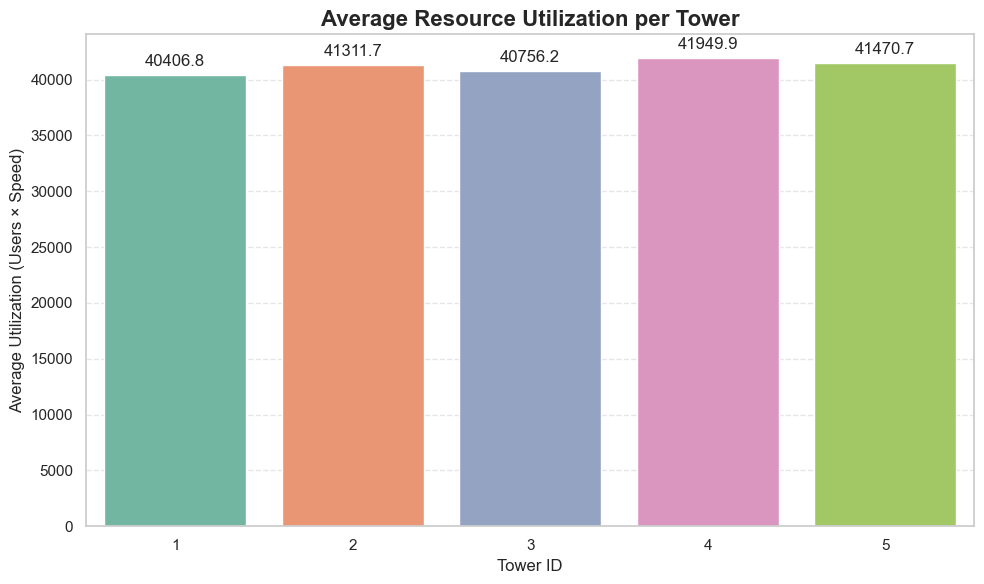

===== Tower-wise Resource Utilization Summary =====
   tower_id   avg_users  avg_speed  avg_utilization
0         1  517.071233  78.034673     40406.775608
1         2   546.36635  75.293534     41311.668584
2         3  523.400545  77.681333     40756.235526
3         4  537.759563  77.977057     41949.949375
4         5  531.964674  77.633574     41470.716576


In [40]:
df['total_speed'] = df['download_speed'] + df['upload_speed']
df['utilization_metric'] = df['users_connected'] * df['total_speed']
 
tower_utilization = df.groupby('tower_id', as_index=False).agg(
    avg_users=('users_connected', 'mean'),
    avg_speed=('total_speed', 'mean'),
    avg_utilization=('utilization_metric', 'mean')
)
 
# === Bar Plot for Average Utilization per Tower ===
plt.figure(figsize=(10,6))
sns.barplot(
    data=tower_utilization,
    x='tower_id',
    y='avg_utilization',
    palette='Set2'
)
 
# Annotate values on top of bars
for i, row in tower_utilization.iterrows():
    plt.text(i, row['avg_utilization']+0.02*row['avg_utilization'], f"{row['avg_utilization']:.1f}", ha='center')
 
plt.title("Average Resource Utilization per Tower", fontsize=16, fontweight='bold')
plt.xlabel("Tower ID", fontsize=12)
plt.ylabel("Average Utilization (Users × Speed)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
 
# === Print Calculations Summary ===
print("===== Tower-wise Resource Utilization Summary =====")
print(tower_utilization)
print("===================================================")